In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [76]:
# Set the working directory
os.chdir('/Users/joaquinmartinezsosa/Desktop/University/BAM/Customer Analytics/Unilever')

# Confirm the working directory
print(os.getcwd())


/Users/joaquinmartinezsosa/Desktop/University/BAM/Customer Analytics/Unilever


In [77]:

# Load Sales data
amazon_reviews = pd.read_csv(os.path.join(os.getcwd(), 'Amazon_categories_final_clean.csv'))


In [78]:
amazon_reviews.head()

,Unnamed: 0,Retailer,EAN_UPC,Product_name,Date,Text,Rating,Brand,GPT_estimated_cleaned
0,1,Amazon_DE,4000400001429,Knorr Sauce Béarnaise 250ml 250ml,2021-01-19,wir konnten dieses produkt im rahmen von amazo...,5,Knorr,Sauces
1,2,Amazon_DE,4000400001429,Knorr Sauce Béarnaise 250ml 250ml,2021-01-23,eigentlich bin ich kein fan von fertigprodukte...,4,Knorr,Sauces
2,3,Amazon_DE,4000400001429,Knorr Sauce Béarnaise 250ml 250ml,2021-02-04,ich habe mit meiner packung zwei bleche pizza ...,4,Knorr,Sauces
3,4,Amazon_DE,4000400001429,Knorr Sauce Béarnaise 250ml 250ml,2021-02-12,tatsächlich habe ich bislang noch nie eine soß...,4,Knorr,Sauces
4,5,Amazon_DE,4000400001429,Knorr Sauce Béarnaise 250ml 250ml,2021-03-05,ich durfte von knorr die sauce bernaise testen...,4,Knorr,Sauces


## General

### Filter Snacks and Soups

In [79]:
amazon_reviews['GPT_estimated_cleaned'].unique()

array(['Sauces', 'Fix Produkte', 'Brühen, Bouillons & Würzmittel',
       'Die Bio Gemüse Bouillon', 'Grillsaucen, Ketchup & Mayo', 'Suppen',
       nan, 'Salatzutaten', 'Snacks & Fertiggerichte',
       'BBQ and Grilling Sauces', 'Mustard and Condiments',
       'Specialty Sauces and Flavors',
       'Mayonnaise, Mayo Alternatives, and Salad Dressings',
       'Natürlich Lecker!', 'Ketchup and Tomato Products',
       'Miscellaneous'], dtype=object)

In [80]:
reviews_sauces_and_snacks = amazon_reviews[(amazon_reviews['GPT_estimated_cleaned'] == 'Sauces') | \
                                           (amazon_reviews['GPT_estimated_cleaned'] == 'Snacks & Fertiggerichte')]

In [81]:
print(f'Length of Amazon_Reviews: {len(amazon_reviews)}\
        \nLength of Reviews after filtering: {len(reviews_sauces_and_snacks)}')

Length of Amazon_Reviews: 68316        
Length of Reviews after filtering: 13894


### How many ratings per product


In [82]:
number_ratings_per_product = reviews_sauces_and_snacks.groupby('Product_name')['Rating'].count().reset_index()

In [83]:
number_ratings_per_product.head()

,Product_name,Rating
0,Knorr Big Pot Pasta Snack Bolognese leckere I...,147
1,Knorr Big Pot Pasta Snack Käse & Sahne lecker...,34
2,Knorr Big Pot Pasta Snack Käse & Sahne lecker...,4
3,Knorr Feinschmecker Champignon Sauce cremige ...,240
4,Knorr Kartoffel Snack Fleischbällchen & Röstz...,303


In [84]:
number_ratings_per_product.describe()

,Rating
count,89.000000
mean,156.112360
std,196.122436
min,2.000000
25%,34.000000
50%,86.000000
75%,187.000000
max,851.000000


Although most products have enough reviews, lets remove those with less than 34 reviews
- ARBITRARY DECISION = using 1st quartile as min

In [85]:
# Remove all products that have less than 9 reviews (below median)
q1 = number_ratings_per_product['Rating'].quantile(0.25)
subset_first_quartiles = number_ratings_per_product[number_ratings_per_product['Rating'] >= q1]


plus34_reviews_sauces_and_snacks = reviews_sauces_and_snacks[reviews_sauces_and_snacks['Product_name'].isin(subset_first_quartiles['Product_name'])]

In [86]:
print(f'Length of Amazon Reviews: {len(reviews_sauces_and_snacks)} \
      \nLength of Amazon Reviews with > 34 reviews: {len(plus34_reviews_sauces_and_snacks)}')

Length of Amazon Reviews: 13894       
Length of Amazon Reviews with > 34 reviews: 13577


In [87]:
# Testing if it worked
#       post_number_ratings_per_product = amazon_reviews_more_than_8_reviews.groupby('product_name')['Rating'].count().reset_index()
#       post_number_ratings_per_product.describe()

## Ratings Analysis

### Avg Rating per Product
Only 300 ish reviews filtered out, so say fuck it and use all of them?

In [88]:
avg_rating_per_product = reviews_sauces_and_snacks.groupby('Product_name')['Rating'].mean().reset_index()
avg_rating_per_product['Product_name'] = avg_rating_per_product['Product_name'].astype('category')
avg_rating_per_product.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Product_name  89 non-null     category
 1   Rating        89 non-null     float64 
dtypes: category(1), float64(1)
memory usage: 3.7 KB


In [89]:
# Sort the values by 'Rating' in increasing order
avg_rating_per_product_sorted = avg_rating_per_product.sort_values(by='Rating')

/var/folders/bs/7jrmr7lx3qgdc1wgj87n85wc0000gn/T/ipykernel_75046/308182343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_name', y='Rating', data=avg_rating_per_product_sorted,


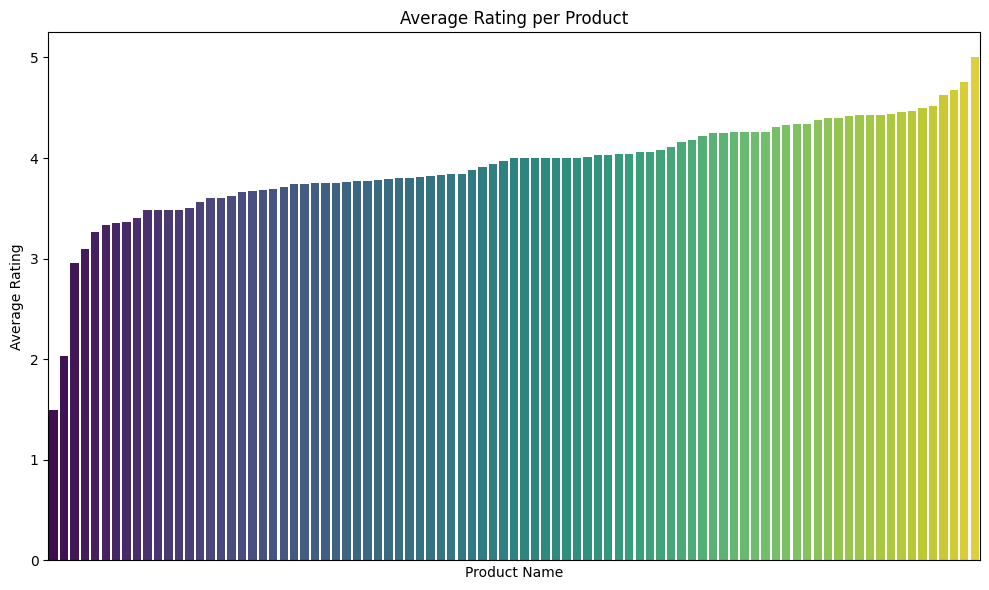

In [90]:

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_name', y='Rating', data=avg_rating_per_product_sorted,
            order=avg_rating_per_product.sort_values('Rating')['Product_name'], palette='viridis')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.title('Average Rating per Product')
plt.xticks([])  
plt.tight_layout()
plt.show()

In [91]:
# Filter only the most extreme rating cases
avg_rating_per_product_sorted_filtered = pd.concat([avg_rating_per_product_sorted.head(10), avg_rating_per_product_sorted.tail(10)])
avg_rating_per_product_sorted_filtered

,Product_name,Rating
29,Knorr Vollkorn Pasta Snack Spinat & Käse leck...,1.500000
78,Knorr Taste the World Reis Snack Chili con Car...,2.027778
77,Knorr Taste the World Pasta Snack Mac & Cheese...,2.959459
74,"Knorr Sweety Milchreis mit Vanillegeschmack, 58 g",3.093023
41,Knorr Asia Noodles Instant Nudeln Huhn-Geschma...,3.261905
63,"Knorr Soße nach Art Hollandaise 3x0,25l 3x250ml",3.333333
44,Knorr Asia Snack Tom Kha Gai Noodles 1 Portion...,3.352941
38,Knorr Asia Noodles Instant Nudeln Curry-Geschm...,3.365854
43,Knorr Asia Snack Green Curry Noodles 1 Portion...,3.400000
39,Knorr Asia Noodles Instant Nudeln Duck Taste l...,3.478947


/var/folders/bs/7jrmr7lx3qgdc1wgj87n85wc0000gn/T/ipykernel_75046/4174754317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_name', y='Rating', data=avg_rating_per_product_sorted_filtered,


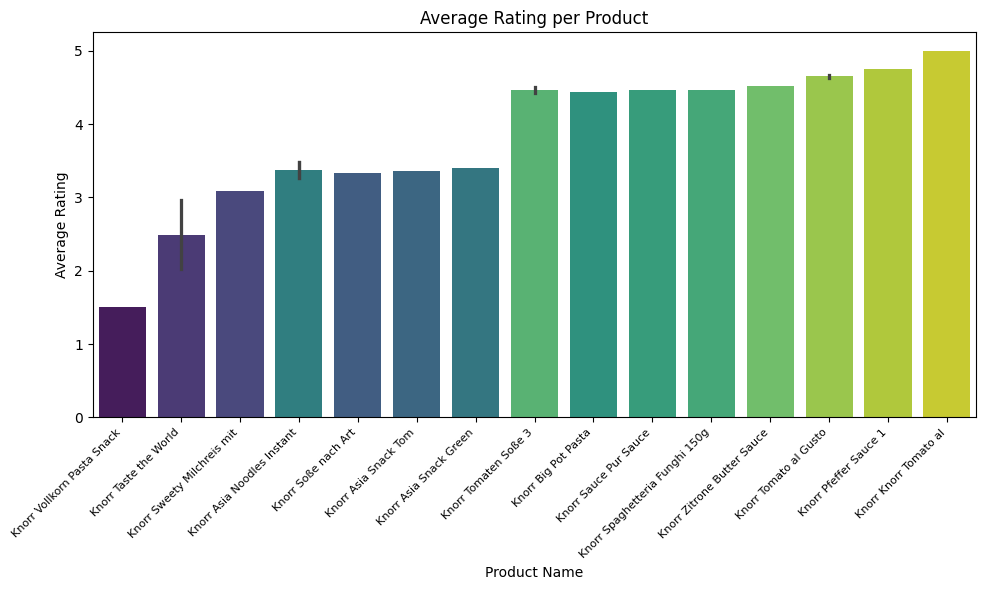

In [104]:
# Convert 'Product_name' to string
avg_rating_per_product_sorted_filtered['Product_name'] = avg_rating_per_product_sorted_filtered['Product_name'].astype(str)

# Truncate product names to first 20 letters for readability
avg_rating_per_product_sorted_filtered['Product_name'] = avg_rating_per_product_sorted_filtered['Product_name'].apply(lambda x: ' '.join(x.split()[:4]))

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_name', y='Rating', data=avg_rating_per_product_sorted_filtered,
            order=avg_rating_per_product_sorted_filtered.sort_values('Rating')['Product_name'], palette='viridis')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.title('Average Rating per Product')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Proportion of 1 and 5 Star Ratings per Product

In [93]:
# Find percent of ratings that are 1s and percent that are 5s
def finding_proportion_of_ones(group):
    count_ratings = len(group)
    count_ones = len(group[group['Rating'] == 1.0])
    
    proportion_ones = count_ones / count_ratings * 100
    return proportion_ones

def finding_proportion_of_fives(group):
    count_ratings = len(group)
    count_fives = len(group[group['Rating'] == 5.0])
    
    proportion_fives = count_fives / count_ratings * 100
    return proportion_fives


In [94]:
proportional_ratings_per_product_ones = plus34_reviews_sauces_and_snacks.groupby('Product_name').apply(finding_proportion_of_ones).reset_index()
proportional_ratings_per_product_fives = plus34_reviews_sauces_and_snacks.groupby('Product_name').apply(finding_proportion_of_fives).reset_index()
proportional_ratings_per_product = pd.merge(proportional_ratings_per_product_ones,proportional_ratings_per_product_fives, \
                                            on ='Product_name', how = 'inner')
proportional_ratings_per_product.columns = [['Product_name','Proportion of 1s','Proportion of 5s']]

In [95]:
proportional_ratings_per_product.head(10)

,Product_name,Proportion of 1s,Proportion of 5s
0,Knorr Big Pot Pasta Snack Bolognese leckere I...,4.081633,42.857143
1,Knorr Big Pot Pasta Snack Käse & Sahne lecker...,2.941176,61.764706
2,Knorr Feinschmecker Champignon Sauce cremige ...,6.666667,60.833333
3,Knorr Kartoffel Snack Fleischbällchen & Röstz...,5.610561,59.075908
4,Knorr Kartoffel Snack Speck & Zwiebeln lecker...,6.542056,57.009346
5,Knorr Pasta Snack Creamy Pesto leckere Instan...,14.285714,50.310559
6,Knorr Pasta Snack Pilz & Rahm leckere Instant...,13.698630,43.639922
7,Knorr Pasta Snack Pot Bolognese leckere Insta...,13.372093,48.837209
8,Knorr Pasta Snack Pot Bolognese leckere Insta...,8.333333,47.222222
9,Knorr Pasta Snack Pot Brokkoli & Käse leckere...,13.218391,50.574713


TypeError: the dtypes of parameters x (<U163) and width (float64) are incompatible

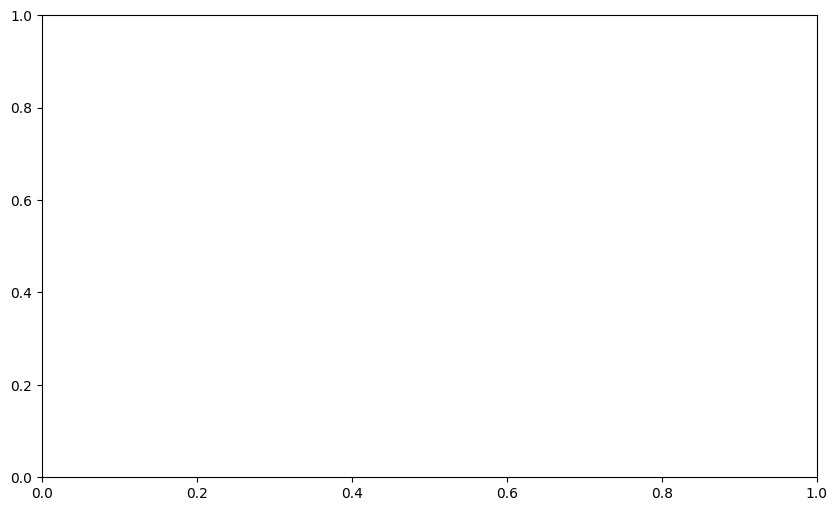

In [107]:
#Truncate product names for readability

# Convert to lists for plotting
product_names = proportional_ratings_per_product['Product_name'].values.tolist()
prop_1s = proportional_ratings_per_product['Proportion of 1s'].values.tolist()
prop_5s = proportional_ratings_per_product['Proportion of 5s'].values.tolist()

# Create the plot
plt.figure(figsize=(10, 6))

# Stacked bar chart
barWidth = 0.35
r = range(len(proportional_ratings_per_product))

# Plot the bars for 'Proportion of 1s'
plt.bar(product_names, prop_1s, color='skyblue', edgecolor='white', width=barWidth, label='Proportion of 1s')

# Plot the bars for 'Proportion of 5s', starting from the top of 'Proportion of 1s' bars
plt.bar(product_names, prop_5s, bottom=prop_1s, color='orange', edgecolor='white', width=barWidth, label='Proportion of 5s')

# Add labels, title, and legend
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.title('Proportion of Ratings per Product', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()